# Programming Assignment - Part 3


## Analysis and Quations


In [1]:
import simstudy3

##### 3.6.1: Seed for Random Number Generation 
By using a seed, the simulation results are deterministic and comparable, despite using random numbers to imitate the real world.

##### 3.6.2: Choosing the right number of bins 
The number of bins is chosen according to the rule of thumbs given in the lecture notes (square root of samples count: $n_{bins} = \sqrt{n}$). If you choose it too high, you will see many peaks but can't spot the correct distribution. When choosing a number which is too small, your distribution will tend to be too coarse, such that you can't identify the curves either.

##### 3.6.3: Arrivals Distribution 


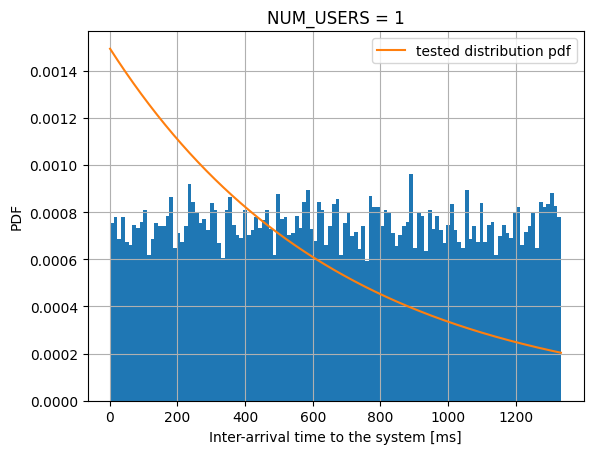

Mean: 668.4767903444416, var: None, chi2: 7219.527360812426; 95.0%-quantile: 146.56735758076744
hypothesis rejected, the samples don't follow the distribution.
Mean: 668.4767903444416, var: None, chi2: 7219.527360812426; 85.0%-quantile: 136.06196081885003
hypothesis rejected, the samples don't follow the distribution.


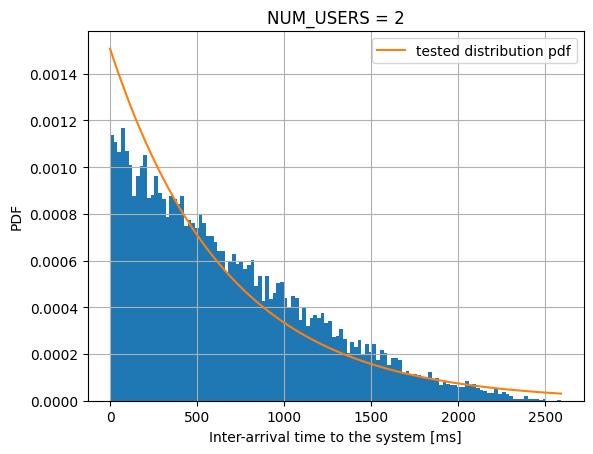

Mean: 663.34821407344, var: None, chi2: 844.0738691339303; 95.0%-quantile: 146.56735758076744
hypothesis rejected, the samples don't follow the distribution.
Mean: 663.34821407344, var: None, chi2: 844.0738691339303; 85.0%-quantile: 136.06196081885003
hypothesis rejected, the samples don't follow the distribution.


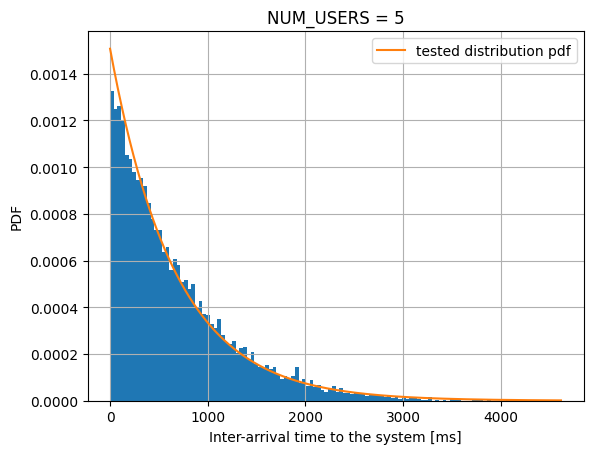

Mean: 663.6243141047814, var: None, chi2: 228.37670585779466; 95.0%-quantile: 123.2252214533618
hypothesis rejected, the samples don't follow the distribution.
Mean: 663.6243141047814, var: None, chi2: 228.37670585779466; 85.0%-quantile: 113.58510550083882
hypothesis rejected, the samples don't follow the distribution.


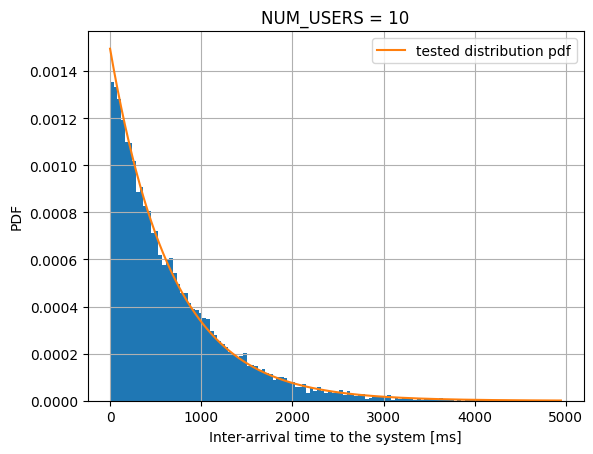

Mean: 669.1507520366396, var: None, chi2: 109.83807415283184; 95.0%-quantile: 118.75161175336736
hypothesis not rejected, the samples follow the distribution.
Mean: 669.1507520366396, var: None, chi2: 109.83807415283184; 85.0%-quantile: 109.28644212053126
hypothesis rejected, the samples don't follow the distribution.


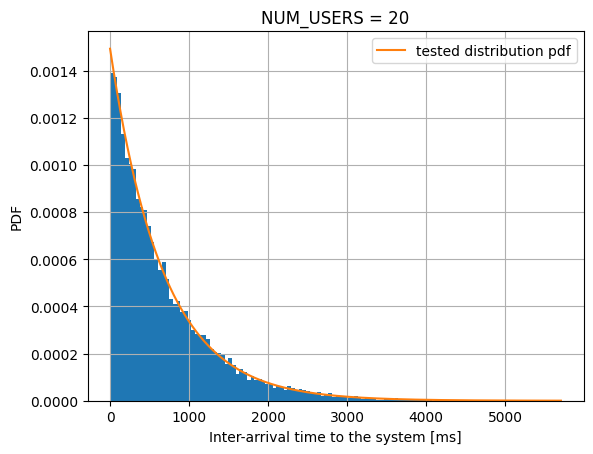

Mean: 670.0779162325904, var: None, chi2: 79.80189410433145; 95.0%-quantile: 106.39484024272251
hypothesis not rejected, the samples follow the distribution.
Mean: 670.0779162325904, var: None, chi2: 79.80189410433145; 85.0%-quantile: 97.43079372695786
hypothesis not rejected, the samples follow the distribution.


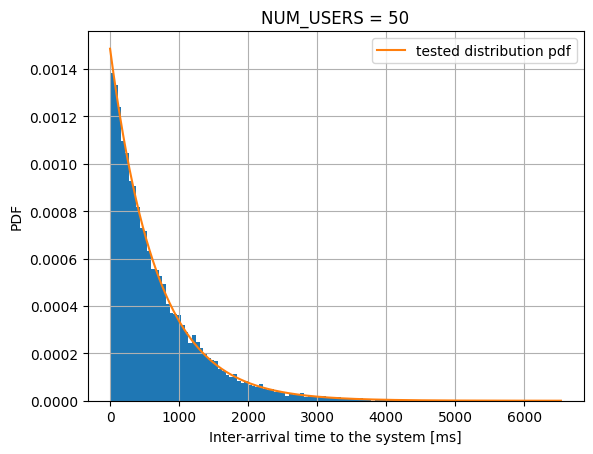

Mean: 673.2698970236972, var: None, chi2: 61.22337377759247; 95.0%-quantile: 96.21667075350383
hypothesis not rejected, the samples follow the distribution.
Mean: 673.2698970236972, var: None, chi2: 61.22337377759247; 85.0%-quantile: 87.68770751738859
hypothesis not rejected, the samples follow the distribution.


In [2]:
simstudy3.task_3_5_1()

Naturally, for a single user with uniformly distributed arrivals, the iat distribution is uniform. When the number of user increases, the distribution looks more like exponential. Testing it with chi square test confirms that at some point, the arrivals start follow the exponential distribution. For each user, the iat is not memoryless - the next arrival depends on how much time has elapsed since the previous one. However, as the number of users increase and their iat increase, global iats become memoryless. The probability of new packet of each user does not depend on the time elapsed since the previous tranmission. 

For higher significance level, the hypothesis is more likely rejected. Thus our hypothesis is still regected for $\alpha = 15\%$  and $10$ users and already accepted for $\alpha = 5\%$ and $10$ users.

##### 3.6.4: Average Arrival Rate and Number of Busy Servers 

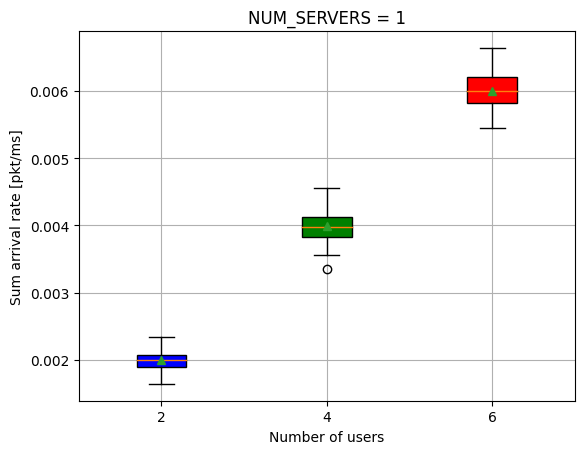

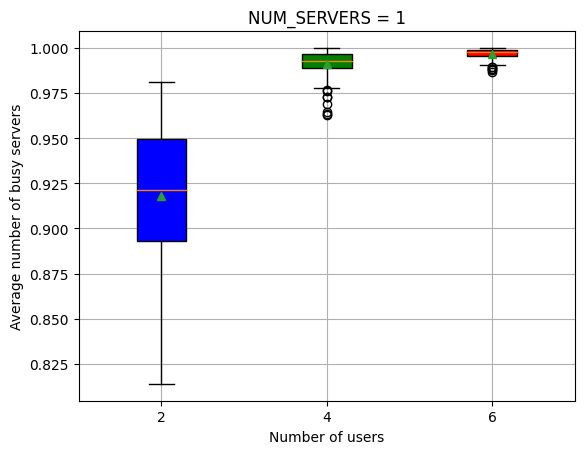

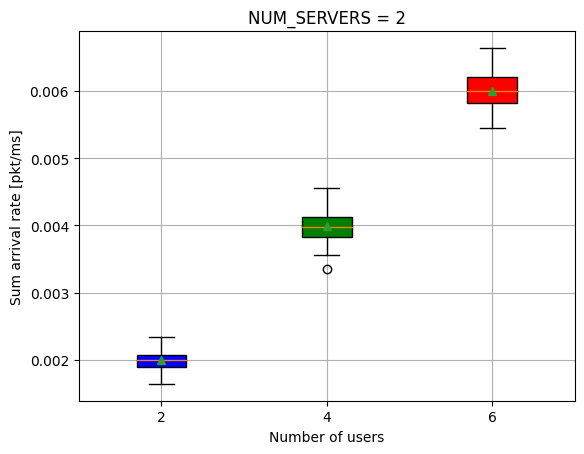

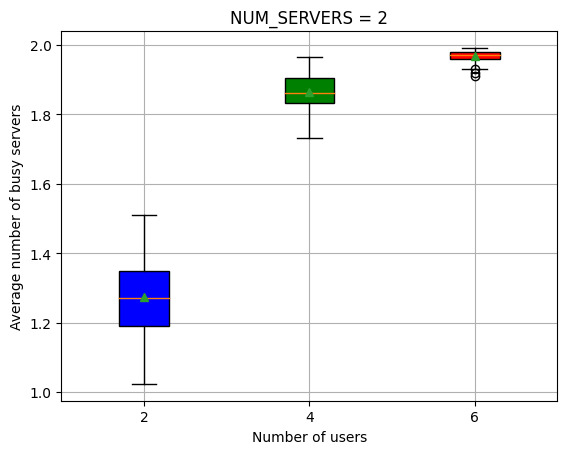

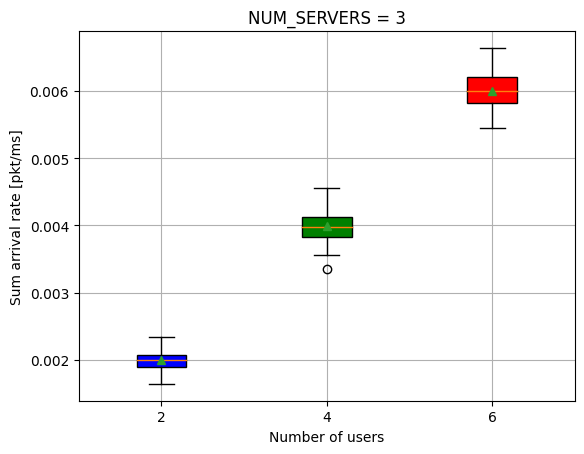

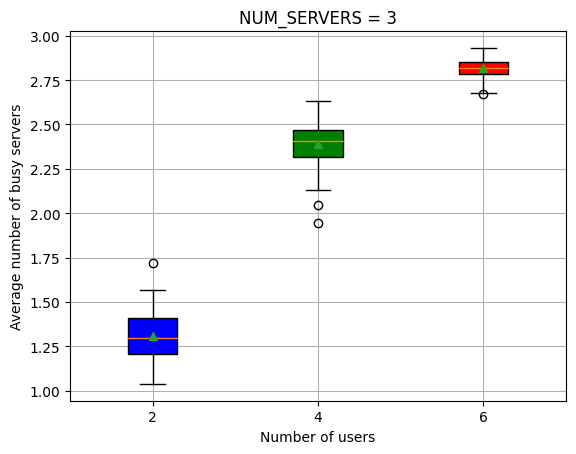

In [3]:
simstudy3.task_3_5_2()

First, let us analyse the arrival rate. We can see that the arrival rate for $2$ user is $\lambda_{acc} = 2 * 0.001$, for $4$ users - $\lambda_{acc} = 4 * 0.001$, for $6$ - $\lambda_{acc} = 6 * 0.001$. Thus, exponential arrival streams accumulate to another exponential stream, with the mean being eqial to accumulated sum of average arrival rates of each user. 

The plots with average nummber of busy servers shows how the actual system throughput behaves compared to that of the system's offered traffic. Even though each actual value depends on random number seed, a general trend can be observed after running the simulation with different seeds.

If no packets are dropped in the system and the offered traffic is less than number of servers, the theoretical average number of busy servers is: $\frac{\lambda_{acc}}{\mu}$, where  $\lambda_{acc}$ is accumulated arrival rate and $\mu$ is the service rate per server. If there are drops in the system $\lambda_{acc}$ should be corrected by the drop probability to get effective aarrival rate $(1 - p_{drop})\lambda_{acc}$. For exponential arrival and departure prosesses, the exact expression for $p_{drop}$ can be derived. The measured number of busy server will converge to the theoretical value for infinite simulation time. If the offered traffic is higher than the available number of servers, the throughput will converge to the number of servers.

For $2$ users, the offered traffic is $\frac{0.002}{0.0015} = 1.33$. For $4$ and $6$ users, it is $2.67$ and $4$, respectively. Note that this would be the measured average number of busy servers in a stable system for the infinite queue size (no losses) and infinite simulation time. If few losses occur, observed number of busy servers is close to the offered traffic, e.g., $2$ users and $2$ or $3$ servers. Observed throughput is considerably less than offered traffic if there are more losses, e.g., $2.5$ servers being busy are measured for $3$ servers and $4$ users. In case the system is not stable, i.e., offered traffic is greater than the number of servers, the throughput converges to its maximum value of number of servers.

